In [18]:
import numpy
import timm
from datasets import load_dataset
import io
import torch
from tqdm import tqdm
from transformers import AutoImageProcessor, AutoProcessor, SegformerForSemanticSegmentation, DetrForSegmentation, CLIPSegForImageSegmentation

from transformers.image_transforms import rgb_to_id
from PIL import Image
import requests
import os
import matplotlib.pyplot as plt



In [20]:

# assign directory
directory = 'data/input_training_highres/'
 

train = []
for filename in os.scandir(directory):
    if filename.is_file():
        train.append(filename.path)

sorted(train)

['data/input_training_highres/GT01.png',
 'data/input_training_highres/GT02.png',
 'data/input_training_highres/GT03.png',
 'data/input_training_highres/GT04.png',
 'data/input_training_highres/GT05.png',
 'data/input_training_highres/GT06.png',
 'data/input_training_highres/GT07.png',
 'data/input_training_highres/GT08.png',
 'data/input_training_highres/GT09.png',
 'data/input_training_highres/GT10.png',
 'data/input_training_highres/GT11.png',
 'data/input_training_highres/GT12.png',
 'data/input_training_highres/GT13.png',
 'data/input_training_highres/GT14.png',
 'data/input_training_highres/GT15.png',
 'data/input_training_highres/GT16.png',
 'data/input_training_highres/GT17.png',
 'data/input_training_highres/GT18.png',
 'data/input_training_highres/GT19.png',
 'data/input_training_highres/GT20.png',
 'data/input_training_highres/GT21.png',
 'data/input_training_highres/GT22.png',
 'data/input_training_highres/GT23.png',
 'data/input_training_highres/GT24.png',
 'data/input_tra

In [22]:
"""Segformer"""

image_processor = AutoImageProcessor.from_pretrained("nvidia/segformer-b0-finetuned-ade-512-512")
model = SegformerForSemanticSegmentation.from_pretrained("nvidia/segformer-b0-finetuned-ade-512-512")


for path in train:
    image = Image.open(path)
   
    inputs = image_processor(images=image, return_tensors="pt")
    outputs = model(**inputs)
    logits = outputs.logits  # shape (batch_size, num_labels, height/4, width/4)
    im = (logits.detach().numpy())[0, 0, :, :]
    plt.imshow(im)
    plt.savefig(f"data/training_seg_segformer/GT{path[-6:]}")
    plt.clf()


# measure score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


/home/rahul/.conda/envs/torchenv/lib/python3.10/site-packages/transformers/models/segformer/image_processing_segformer.py:99: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


<Figure size 640x480 with 0 Axes>

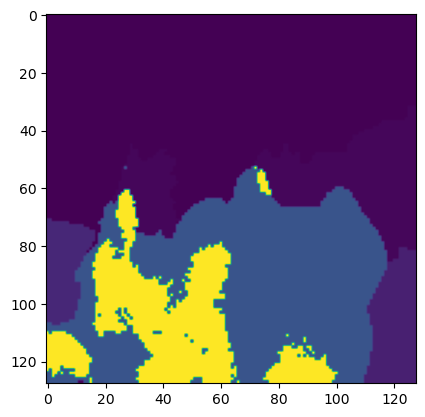

In [31]:
x = logits[0].argmax(0)
seg = x.detach().numpy()
plt.imshow(seg)





In [17]:
image_processor = AutoImageProcessor.from_pretrained("facebook/detr-resnet-50-panoptic")

model = DetrForSegmentation.from_pretrained("facebook/detr-resnet-50-panoptic")
for path in train:
    image = Image.open(path)

    inputs = image_processor(images=image, return_tensors="pt")

# forward pass

    outputs = model(**inputs)

# Use the `post_process_panoptic_segmentation` method of the `image_processor` to retrieve post-processed panoptic segmentation maps

# Segmentation results are returned as a list of dictionaries

    result = image_processor.post_process_panoptic_segmentation(outputs, target_sizes=[(300, 500)])

# A tensor of shape (height, width) where each value denotes a segment id, filled with -1 if no segment is found

    panoptic_seg = result[0]["segmentation"]

# Get prediction score and segment_id to class_id mapping of each segment

    panoptic_segments_info = result[0]["segments_info"]
    im = (panoptic_seg.detach().numpy())
    plt.imshow(im)
    plt.savefig(f"data/training_seg_DetrFor/GT{path[-6:]}")
    plt.clf()





Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


<Figure size 640x480 with 0 Axes>

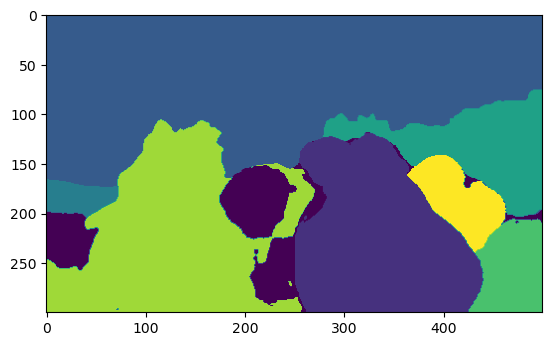

In [13]:
im = (panoptic_seg.detach().numpy())
plt.imshow(im)